<a href="https://colab.research.google.com/github/hubble99/Prediction-Houses-Price/blob/main/Prediction_Houses_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import librabry
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_column', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleansing

In [74]:
# import dataset yang digunakan yaitu House Price
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [75]:
#cek 5 data awal untuk melihat gambaran dataset yang digunakan
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
#Kumudian coba melihat ringkasan data seperti tipe data, apakah ada data yang kosong atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling Missing Value

In [77]:
#Terlihat ada beberapa data yang kosong
#Kemudian akan dicek total missing value
data.isna().sum().sum()

6965

In [78]:
#Kemudian akan dilihat kolom mana saja yang ada missing valuenya
kolom = data.columns[data.isna().any()]
data[kolom].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [79]:
#Kemudian kita akan menghapus kolom yang mana, 50% dari datanya ada missing value
#total data baris ada 1460 baris, maka jika ada 730 data yang kosong maka kolom tersebut akan dihapus
batas = 730
kolomhapus = data.isna().sum()[data.isna().sum()>batas]
kolomhapus

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [80]:
#Kita akan drop kolom yang memiliki baris kosong lebih dari batas
data1 = data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1)
data1.shape

(1460, 77)

In [81]:
#Check apakah masih ada missing value
kolom1 = data1.columns[data1.isna().any()]
data1[kolom1].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [82]:
# Cek isi kategori data dari data kategorikal
print(data1['MasVnrType'].unique())
print(data1['BsmtQual'].unique())
print(data1['GarageFinish'].unique())
print(data1['GarageQual'].unique())
print(data1['GarageCond'].unique())
print(data1['FireplaceQu'].unique())
print(data1['Electrical'].unique())

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [83]:
# Cek data Gerage yang ada missing value
data1[data1['GarageCond'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


In [84]:
# dalam kasus kolom basement, gerage, dan fireplace untuk kategori NA atau tidak ada basement, tidak ada gerage, dan tidak ada fireplace
# tidak terdeteksi sebagai NA tapi dideteksi sebagai missing value, maka missing value tersebut akan diisi dengan NA
data1[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','FireplaceQu','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2']] = data1[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','FireplaceQu','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')

In [85]:
#Check apakah masih ada missing value
kolom1 = data1.columns[data1.isna().any()]
data1[kolom1].isna().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


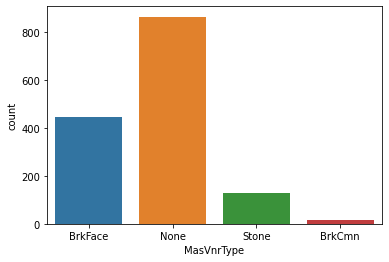

In [86]:
#Cek distribusi dari MasVnrType
print(sns.countplot(data=data1, x='MasVnrType'))

In [87]:
# isi missing value MasVnrType dengan modus
data1['MasVnrType']=data1['MasVnrType'].fillna('None')

AxesSubplot(0.125,0.125;0.775x0.755)


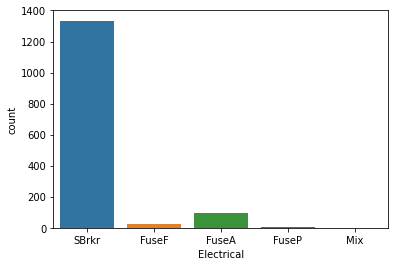

In [88]:
#Cek distribusi dari Electrical
print(sns.countplot(data=data1, x='Electrical'))

In [89]:
# isi missing value elictrical dengan modus
data1['Electrical']=data1['Electrical'].fillna('SBrkr')

In [90]:
#Check apakah masih ada missing value
kolom1 = data1.columns[data1.isna().any()]
data1[kolom1].isna().sum()

LotFrontage    259
MasVnrArea       8
dtype: int64

In [91]:
data1.shape

(1460, 77)

In [92]:
#isi missing value data numerik dengan interpolasi
data1['LotFrontage'] = data1['LotFrontage'].interpolate(method="linear")
data1['MasVnrArea'] = data1['MasVnrArea'].interpolate(method="linear")

In [93]:
#Check apakah masih ada missing value
kolom1 = data1.columns[data1.isna().any()]
data1[kolom1].isna().sum()

Series([], dtype: float64)

In [94]:
#Kemudian akan kita cek apakah ada data yang terduplikat
data1.duplicated().sum()

0

### Outlier Handling

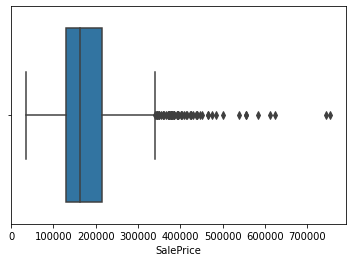

In [95]:
# Check boxplot saleprice
sns.boxplot(x=data1['SalePrice'])

In [96]:
#Karena akan memprediksi SalePrice, kita akan cek dulu apakah ada outlier atau tidak pada saleprice ini
Q1 = data1['SalePrice'].quantile(0.25)
Q3 = data1['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lowerbound_MC = Q1 - 1.5*IQR
upperbound_MC = Q3 + 1.5*IQR
sum((data1['SalePrice']>upperbound_MC) | (data1['SalePrice']<lowerbound_MC))

61

In [97]:
#ternyata ada 61 outlier pada SalePrice
#data outlier ini akan kita buang karena tidak terlalu banyak, yaitu hanya 4% dari data
data1 = data1[~((data1['SalePrice']>upperbound_MC) | (data1['SalePrice']<lowerbound_MC))]

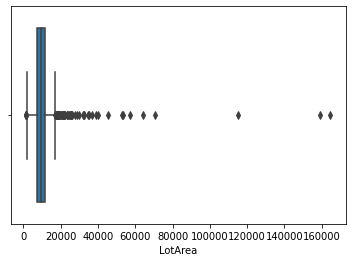

In [98]:
# cek boxplot data luas area atau lot area
sns.boxplot(x=data1['LotArea'])

In [99]:
#Cek outlier LotArea
Q1 = data1['LotArea'].quantile(0.25)
Q3 = data1['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lowerbound_MC = Q1 - 1.5*IQR
upperbound_MC = Q3 + 1.5*IQR
sum((data1['LotArea']>upperbound_MC))

66

In [100]:
data1 = data1[~(data1['LotArea']>upperbound_MC)]

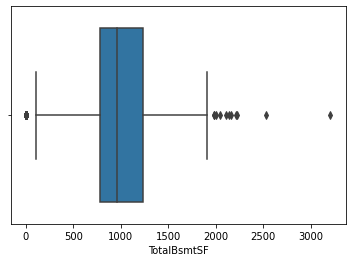

In [101]:
#Cek outlier TotalBsmtSF
sns.boxplot(x=data1['TotalBsmtSF'])

In [102]:
Q1 = data1['TotalBsmtSF'].quantile(0.25)
Q3 = data1['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
lowerbound_MC = Q1 - 1.5*IQR
upperbound_MC = Q3 + 1.5*IQR
sum((data1['TotalBsmtSF']>upperbound_MC))

11

In [103]:
data1 = data1[~((data1['TotalBsmtSF']>upperbound_MC))]

In [104]:
#Ringkasan data numerik
data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,728.276853,58.142965,68.154123,9047.449319,5.973525,5.593797,1970.351740,1984.212557,88.268154,401.574887,43.347958,555.029501,999.952345,1107.753404,334.873676,5.363086,1447.990166,0.397882,0.057489,1.529501,0.370651,2.849470,1.049168,6.368381,0.551437,1.699697,452.034796,86.600605,43.262481,22.099849,2.837368,14.349470,1.318457,40.419062,6.300303,2007.823752,167994.356278
std,421.813037,43.039918,19.607156,3094.280243,1.276965,1.109067,30.146795,20.674238,155.098787,392.491721,152.125939,425.661530,360.686892,321.277623,416.497446,45.633996,446.970298,0.506367,0.239275,0.531626,0.500099,0.805472,0.226556,1.512401,0.612142,0.723657,199.140721,118.255165,63.025714,59.740233,27.267370,54.237768,27.770321,468.357870,2.690688,1.325786,58252.580624
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,59.000000,7231.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,220.250000,780.000000,864.000000,0.000000,0.000000,1110.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,734.500000,50.000000,68.000000,9120.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,360.500000,0.000000,469.000000,960.000000,1055.500000,0.000000,0.000000,1415.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000,462.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157000.000000
75%,1090.750000,70.000000,80.000000,10929.250000,7.000000,6.000000,2000.000000,2003.000000,143.000000,672.000000,0.000000,795.750000,1224.750000,1314.000000,720.000000,0.000000,1713.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,572.000000,159.750000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,200000.000000
max,1460.000000,190.000000,182.000000,17120.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1619.000000,1474.000000,1907.000000,1907.000000,2898.000000,1611.000000,528.000000,3395.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1069.000000,736.000000,547.000000,386.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,340000.000000


In [105]:
#Ringkasan data kategorikal
data1.describe(include = 'object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322
unique,5,2,4,4,2,5,3,25,9,6,5,8,5,5,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,6,6,7,96,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,NA,Unf,TA,TA,Y,WD,Normal
freq,1019,1319,864,1213,1321,963,1270,212,1142,1310,1089,651,1074,1312,468,457,814,852,1163,584,609,1184,908,402,1138,1292,648,1230,1202,691,1233,675,769,79,572,1179,1191,1214,1169,1108


# Data Preprocessing

In [106]:
#Converting distinct values using label encoding
from sklearn.preprocessing import LabelEncoder
obj_col = []
for col in data1.columns: 
    if(data1[col].dtype == object):
        obj_col.append(col)
           
labelencoder = LabelEncoder()
for i in obj_col:
    data1[i] = labelencoder.fit_transform(data1[i].astype(str)) 

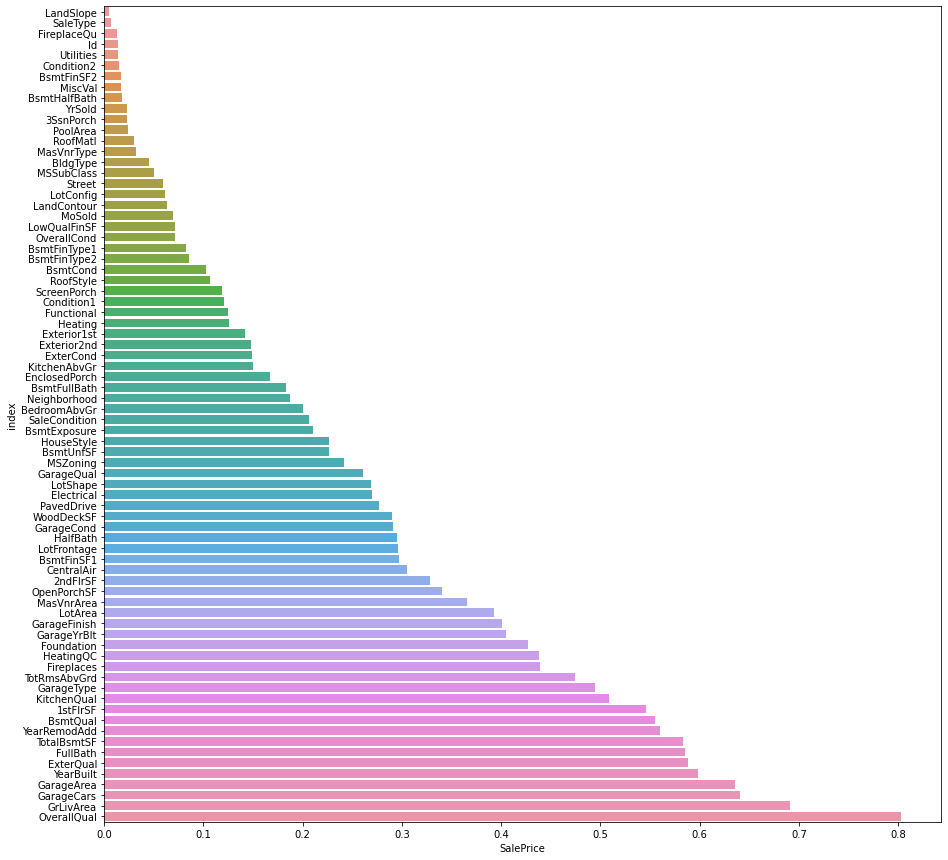

In [107]:
#Karena kita akan memprediksi SalePrice, kita akan melihat korelasi saleprice dengan variabel lain
dataC = abs(data1.corr())['SalePrice'].sort_values().reset_index()
dataC = dataC[~dataC['index'].str.contains('SalePrice')]
plt.figure(figsize = (15,15))
sns.barplot(data = dataC.reset_index(), y='index', x = 'SalePrice')

#Feature Selection

In [108]:
#Kemudian kita akan membagi variabel, variabel dependen adalah saleprice dan yang lainnya adalah variabel independen
X = data1.drop('SalePrice', axis = 1)
y = data1['SalePrice']

### Backwards

In [109]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
print(model.pvalues)

const            0.666141
Id               0.101300
MSSubClass       0.167686
MSZoning         0.003092
LotFrontage      0.646787
                   ...   
MiscVal          0.986457
MoSold           0.406805
YrSold           0.161138
SaleType         0.961236
SaleCondition    0.000007
Length: 77, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']


In [111]:
X_newB = data1[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']]
X_newB.shape

(1322, 33)

### Tree-based feature selection

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_newT = model.transform(X)
X_newT.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1322, 36)

### L1-based feature selection

In [113]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_newL = model.transform(X)
X_newL.shape

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1322, 27)

# Modelling

### Linear Regression

Backwards Features

In [114]:
#Kemudian datanya di split menjadi data training dengan data test untuk evaluasi model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_newB, y, test_size = 0.2, random_state=42)

In [115]:
#Membentuk model regresi
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_Bprediction = LR.predict(X_test)

In [116]:
#Kemudian evaluasi model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

print('R2     ',r2_score(y_test,y_Bprediction))
print('MPE    ',mean_absolute_percentage_error(y_test,y_Bprediction))
print('RMSLE  ',mean_squared_log_error(y_test,y_Bprediction,squared= False))
print('MAE    ',mean_absolute_error(y_test,y_Bprediction))

R2      0.8957960253064512
MPE     0.09203805850928666
RMSLE   0.15074800438314737
MAE     14044.163950009532


Tree-based features

In [117]:
#Kemudian datanya di split menjadi data training dengan data test untuk evaluasi model
X_train, X_test, y_train, y_test = train_test_split(X_newT, y, test_size = 0.2, random_state=42)

In [118]:
#Membentuk model regresi
LR = LinearRegression()
LR.fit(X_train,y_train)
y_Tprediction = LR.predict(X_test)

In [119]:
#Kemudian evaluasi model
print('R2     ',r2_score(y_test,y_Tprediction))
print('MPE    ',mean_absolute_percentage_error(y_test,y_Tprediction))
print('RMSLE  ',mean_squared_log_error(y_test,y_Tprediction,squared= False))
print('MAE    ',mean_absolute_error(y_test,y_Tprediction))

R2      0.892799009671358
MPE     0.09313710561881687
RMSLE   0.12713016502126462
MAE     14403.497355719248


L1-based features

In [120]:
#Kemudian datanya di split menjadi data training dengan data test untuk evaluasi model
X_train, X_test, y_train, y_test = train_test_split(X_newL, y, test_size = 0.2, random_state=42)

In [121]:
#Membentuk model regresi
LR = LinearRegression()
LR.fit(X_train,y_train)
y_Lprediction = LR.predict(X_test)

In [122]:
#Kemudian evaluasi model
print('R2     ',r2_score(y_test,y_Lprediction))
print('MPE    ',mean_absolute_percentage_error(y_test,y_Lprediction))
print('RMSLE  ',mean_squared_log_error(y_test,y_Lprediction,squared= False))
print('MAE    ',mean_absolute_error(y_test,y_Lprediction))

R2      0.8315743023795988
MPE     0.11563663378480173
RMSLE   0.15596533932272705
MAE     17854.780519078427


### XGBRegressor

Backwards Features

In [123]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_newB, y, test_size = 0.2, random_state=42)

In [124]:
# Fit model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8
)

xgb_model = xgb_model.fit(X_train,y_train)

Bpreds_XGB = xgb_model.predict(X_test)

mean_absolute_error(y_test, Bpreds_XGB)

[15:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


13583.820047169811

In [125]:
#Kemudian evaluasi model
print('R2     ',r2_score(y_test,Bpreds_XGB))
print('MPE    ',mean_absolute_percentage_error(y_test,Bpreds_XGB))
print('RMSLE  ',mean_squared_log_error(y_test,Bpreds_XGB,squared= False))
print('MAE    ',mean_absolute_error(y_test,Bpreds_XGB))

R2      0.8977201284856543
MPE     0.08680487687804658
RMSLE   0.12188831827958008
MAE     13583.820047169811


Tree-based features

In [126]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_newT, y, test_size = 0.2, random_state=42)

In [127]:
# Fit model
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8
)

xgb_model = xgb_model.fit(X_train,y_train)

Tpreds_XGB = xgb_model.predict(X_test)

[15:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
#Kemudian evaluasi model
print('R2     ',r2_score(y_test,Tpreds_XGB))
print('MPE    ',mean_absolute_percentage_error(y_test,Tpreds_XGB))
print('RMSLE  ',mean_squared_log_error(y_test,Tpreds_XGB,squared= False))
print('MAE    ',mean_absolute_error(y_test,Tpreds_XGB))

R2      0.9054129867056628
MPE     0.08734918539491611
RMSLE   0.12527537955891946
MAE     13361.280748820755


L1-based features

In [129]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_newL, y, test_size = 0.2, random_state=42)

In [130]:
#Fit model
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8
)

xgb_model = xgb_model.fit(X_train,y_train)

Lpreds_XGB = xgb_model.predict(X_test)

[15:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [131]:
#Kemudian evaluasi model
print('R2     ',r2_score(y_test,Lpreds_XGB))
print('MPE    ',mean_absolute_percentage_error(y_test,Lpreds_XGB))
print('RMSLE  ',mean_squared_log_error(y_test,Lpreds_XGB,squared= False))
print('MAE    ',mean_absolute_error(y_test,Lpreds_XGB))

R2      0.869057383454535
MPE     0.10212035446796645
RMSLE   0.14419395377879268
MAE     15307.999734669811


#Compare Models

R2 Score

In [132]:
model_performances_r2 = pd.DataFrame({
    "Model": ["Linear Regression", "XGBRegressor"],
    "Backwards": [r2_score(y_test,y_Bprediction), r2_score(y_test,Bpreds_XGB)],
    "Tree-based": [r2_score(y_test,y_Tprediction), r2_score(y_test,Tpreds_XGB)],
    "L1-based": [r2_score(y_test,y_Lprediction), r2_score(y_test,Lpreds_XGB)],
})

model_performances_r2

,Model,Backwards,Tree-based,L1-based
0,Linear Regression,0.895796,0.892799,0.831574
1,XGBRegressor,0.897720,0.905413,0.869057


Mean Absolute Error

In [133]:
model_performances_mae = pd.DataFrame({
    "Model": ["Linear Regression", "XGBRegressor"],
    "Backwards": [mean_absolute_error(y_test,y_Bprediction), mean_absolute_error(y_test,Bpreds_XGB)],
    "Tree-based": [mean_absolute_error(y_test,y_Tprediction), mean_absolute_error(y_test,Tpreds_XGB)],
    "L1-based": [mean_absolute_error(y_test,y_Lprediction), mean_absolute_error(y_test,Lpreds_XGB)],
})

model_performances_mae

,Model,Backwards,Tree-based,L1-based
0,Linear Regression,14044.163950,14403.497356,17854.780519
1,XGBRegressor,13583.820047,13361.280749,15307.999735


Mean Squared Log Error

In [134]:
model_performances_rmsle = pd.DataFrame({
    "Model": ["Linear Regression", "XGBRegressor"],
    "Backwards": [mean_squared_log_error(y_test,y_Bprediction,squared= False), mean_squared_log_error(y_test,Bpreds_XGB,squared= False)],
    "Tree-based": [mean_squared_log_error(y_test,y_Tprediction,squared= False), mean_squared_log_error(y_test,Tpreds_XGB,squared= False)],
    "L1-based": [mean_squared_log_error(y_test,y_Lprediction,squared= False), mean_squared_log_error(y_test,Lpreds_XGB,squared= False)],
})

model_performances_rmsle

,Model,Backwards,Tree-based,L1-based
0,Linear Regression,0.150748,0.127130,0.155965
1,XGBRegressor,0.121888,0.125275,0.144194
